[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Silhouette Skoru: 0.003735656700892454


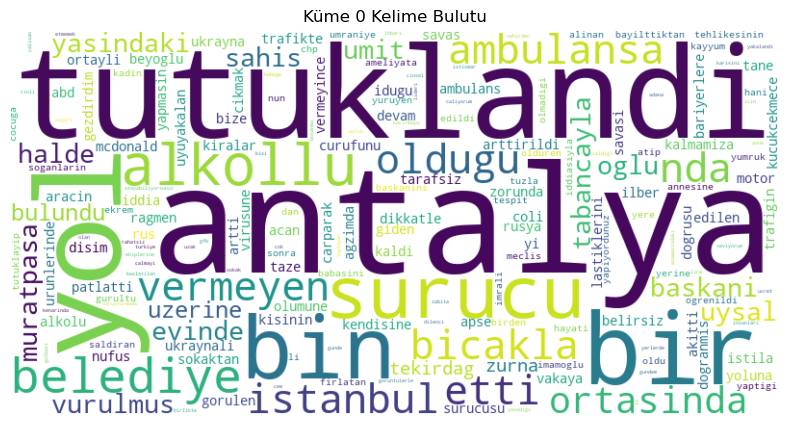

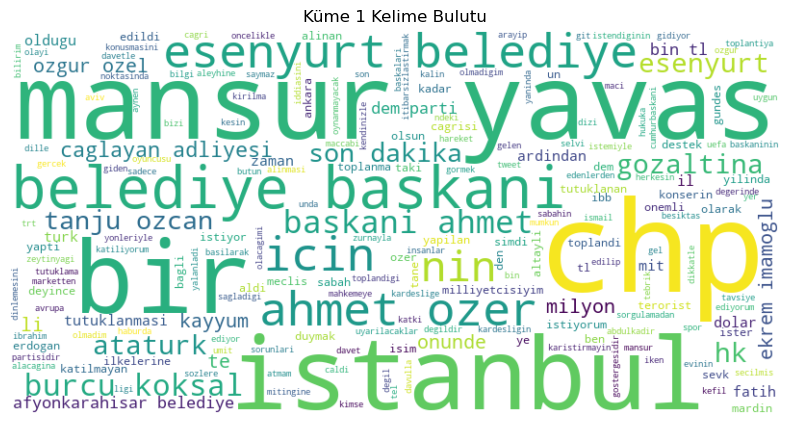

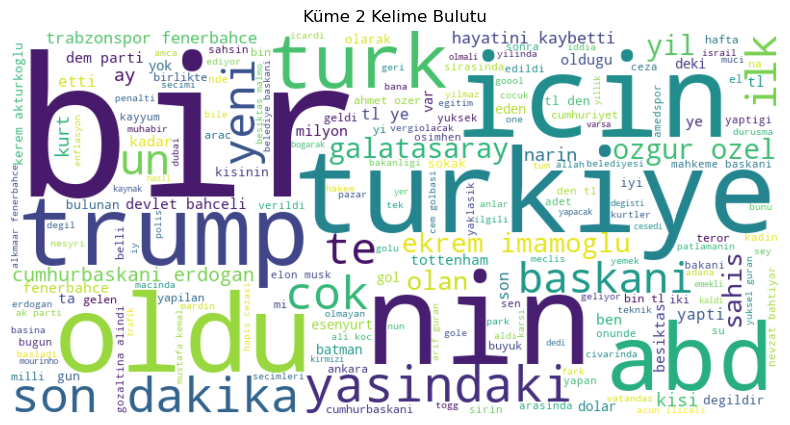

Küme 0: Toplam kelime sayısı = 245, Farklı kelime sayısı = 193
Küme 1: Toplam kelime sayısı = 842, Farklı kelime sayısı = 519
Küme 2: Toplam kelime sayısı = 5049, Farklı kelime sayısı = 2877


In [27]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk


nltk.download('stopwords')
stop_words = set(stopwords.words('turkish'))


tweets_df = pd.read_excel('C:/Users/meric/Desktop/scraped_tweets.xlsx')


def preprocess_text(text):
    text = re.sub(r"http\S+|@\S+|[^A-Za-zçÇğĞıİöÖşŞüÜ ]", " ", text)  
    text = re.sub(r"\b(\w+)(nin|nın|nun|nün|)\b", r"\1", text)
    text = re.sub(r"\b\w\b", "", text)  
    text = text.lower()  
    words = text.split()
    words = [word for word in words if word not in stop_words]  
    return " ".join(words)


tweets_df['cleaned_tweets'] = tweets_df['bosunatiklama Tweets'].apply(preprocess_text)


tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets_df['cleaned_tweets'])


kmeans = KMeans(n_clusters=3, random_state=42)
tweets_df['cluster'] = kmeans.fit_predict(tfidf_matrix)


silhouette_avg = silhouette_score(tfidf_matrix, tweets_df['cluster'])
print(f"Silhouette Skoru: {silhouette_avg}")


for i in range(3):
    cluster_texts = " ".join(tweets_df[tweets_df['cluster'] == i]['cleaned_tweets'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Küme {i} Kelime Bulutu")
    plt.axis('off')
    plt.show()


cluster_info = {}
for i in range(3):
    words_in_cluster = " ".join(tweets_df[tweets_df['cluster'] == i]['cleaned_tweets']).split()
    unique_words = set(words_in_cluster)
    cluster_info[i] = {
        'total_words': len(words_in_cluster),
        'unique_words_count': len(unique_words),
    }
    print(f"Küme {i}: Toplam kelime sayısı = {cluster_info[i]['total_words']}, Farklı kelime sayısı = {cluster_info[i]['unique_words_count']}")


tweets_df.to_excel('cleaned_clustered_tweets.xlsx', index=False)
